In [3]:
import csv
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
X_raw = pd.read_csv(r"C:\Users\Hungdever\Desktop\My_study\EPL\data\results.csv")
X_retrieved = X_raw.iloc[:, 4:]
X_retrieved

,Req_Age,Pltime_matches_played,Pltime_starts,Pltime_minutes,Defen_Att,Defen_Blocks,Defen_Int,Defen_Lost,Defen_Pass,Defen_Sh,...,Prog_PrgP,Prog_PrgR,Shoot_Dist,Shoot_G/Sh,Shoot_SoT%,Shoot_SoT/90,per90_Ast,per90_Gls,per90_xG,per90_xGA
0,35.0,15.0,8.0,676.0,N/a,9.0,8.0,N/a,5.0,4.0,...,28.0,2.0,29.8,0.0,0.0,0.00,0.00,0.00,0.01,0.15
1,26.0,27.0,27.0,2430.0,N/a,0.0,2.0,N/a,0.0,0.0,...,0.0,0.0,N/a,N/a,N/a,0.00,0.00,0.00,0.00,0.00
2,27.0,33.0,32.0,2884.0,N/a,32.0,60.0,N/a,23.0,9.0,...,132.0,150.0,15.1,0.13,31.3,0.16,0.09,0.06,0.04,0.10
3,32.0,30.0,29.0,2425.0,N/a,30.0,9.0,N/a,24.0,6.0,...,78.0,91.0,13.8,0.1,31.0,0.33,0.04,0.11,0.14,0.09
4,21.0,6.0,6.0,503.0,N/a,5.0,3.0,N/a,1.0,4.0,...,25.0,2.0,23.9,0.0,0.0,0.00,0.00,0.00,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,28.0,35.0,35.0,2997.0,N/a,37.0,22.0,N/a,21.0,16.0,...,234.0,48.0,20.3,0.08,31.6,0.36,0.21,0.09,0.09,0.21
490,24.0,29.0,15.0,1467.0,N/a,17.0,10.0,N/a,10.0,7.0,...,68.0,76.0,19.2,0.08,38.5,0.31,0.06,0.06,0.03,0.14
491,28.0,25.0,16.0,1300.0,N/a,9.0,16.0,N/a,3.0,6.0,...,72.0,3.0,23.4,0.18,36.4,0.28,0.00,0.14,0.04,0.02
492,31.0,15.0,11.0,955.0,N/a,11.0,15.0,N/a,6.0,5.0,...,34.0,34.0,23.7,0.0,0.0,0.00,0.09,0.00,0.02,0.12


In [5]:
X_retrieved['Pltime_matches_played'] = pd.to_numeric(X_retrieved['Pltime_matches_played'], errors='coerce')
X_retrieved = X_retrieved[X_retrieved['Pltime_matches_played'].notna() & (X_retrieved['Pltime_matches_played'] != 0)].copy()

cols_to_check = X_retrieved.columns.drop('Req_Age', errors='ignore')
X_temp = X_retrieved[cols_to_check].apply(pd.to_numeric, errors='coerce')
X_temp

,Pltime_matches_played,Pltime_starts,Pltime_minutes,Defen_Att,Defen_Blocks,Defen_Int,Defen_Lost,Defen_Pass,Defen_Sh,Defen_Tkl,...,Prog_PrgP,Prog_PrgR,Shoot_Dist,Shoot_G/Sh,Shoot_SoT%,Shoot_SoT/90,per90_Ast,per90_Gls,per90_xG,per90_xGA
0,15.0,8.0,676.0,NaN,9.0,8.0,NaN,5.0,4.0,9.0,...,28.0,2.0,29.8,0.00,0.0,0.00,0.00,0.00,0.01,0.15
1,27.0,27.0,2430.0,NaN,0.0,2.0,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00
2,33.0,32.0,2884.0,NaN,32.0,60.0,NaN,23.0,9.0,64.0,...,132.0,150.0,15.1,0.13,31.3,0.16,0.09,0.06,0.04,0.10
3,30.0,29.0,2425.0,NaN,30.0,9.0,NaN,24.0,6.0,45.0,...,78.0,91.0,13.8,0.10,31.0,0.33,0.04,0.11,0.14,0.09
4,6.0,6.0,503.0,NaN,5.0,3.0,NaN,1.0,4.0,5.0,...,25.0,2.0,23.9,0.00,0.0,0.00,0.00,0.00,0.00,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,35.0,35.0,2997.0,NaN,37.0,22.0,NaN,21.0,16.0,83.0,...,234.0,48.0,20.3,0.08,31.6,0.36,0.21,0.09,0.09,0.21
490,29.0,15.0,1467.0,NaN,17.0,10.0,NaN,10.0,7.0,29.0,...,68.0,76.0,19.2,0.08,38.5,0.31,0.06,0.06,0.03,0.14
491,25.0,16.0,1300.0,NaN,9.0,16.0,NaN,3.0,6.0,47.0,...,72.0,3.0,23.4,0.18,36.4,0.28,0.00,0.14,0.04,0.02
492,15.0,11.0,955.0,NaN,11.0,15.0,NaN,6.0,5.0,25.0,...,34.0,34.0,23.7,0.00,0.0,0.00,0.09,0.00,0.02,0.12


In [6]:
for col in X_retrieved.columns:
    if X_retrieved[col].dtype == 'object':
        X_retrieved[col] = pd.to_numeric(X_retrieved[col], errors='coerce')
        X_retrieved[col] = X_retrieved[col].fillna(0)
        if X_retrieved[col].apply(float.is_integer).all():
             X_retrieved[col] = X_retrieved[col].astype(int)
        print(f"Converted non-numeric values and NaN to 0 in column: {col}, dtype now: {X_retrieved[col].dtype}")


X_numeric = pd.DataFrame()
print("Sample data after conversion to numeric 0:")
print(X_retrieved.head(3))
print("Data types after conversion:")
print(X_retrieved.dtypes)

Converted non-numeric values and NaN to 0 in column: Defen_Att, dtype now: int32
Converted non-numeric values and NaN to 0 in column: Defen_Lost, dtype now: int32
Converted non-numeric values and NaN to 0 in column: GK_CS%, dtype now: float64
Converted non-numeric values and NaN to 0 in column: GK_GA90, dtype now: float64
Converted non-numeric values and NaN to 0 in column: GK_PK_Save%, dtype now: float64
Converted non-numeric values and NaN to 0 in column: GK_Save%, dtype now: float64
Converted non-numeric values and NaN to 0 in column: Misc_Won%, dtype now: float64
Converted non-numeric values and NaN to 0 in column: Pass_cpt_long, dtype now: float64
Converted non-numeric values and NaN to 0 in column: Poss_Succ%, dtype now: float64
Converted non-numeric values and NaN to 0 in column: Poss_Tkld%, dtype now: float64
Converted non-numeric values and NaN to 0 in column: Shoot_Dist, dtype now: float64
Converted non-numeric values and NaN to 0 in column: Shoot_G/Sh, dtype now: float64
Con

In [7]:
# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_retrieved)
X_standardized.shape

(494, 74)

In [8]:
std_df = pd.DataFrame(X_standardized, columns=X_retrieved.columns)
print("Mean of standardized data:")
print(std_df.mean().head())
print("\nStandard deviation of standardized data:")
print(std_df.std().head())

Mean of standardized data:
Req_Age                  3.739699e-16
Pltime_matches_played    2.157518e-17
Pltime_starts            3.236278e-17
Pltime_minutes           1.114718e-16
Defen_Att                0.000000e+00
dtype: float64

Standard deviation of standardized data:
Req_Age                  1.001014
Pltime_matches_played    1.001014
Pltime_starts            1.001014
Pltime_minutes           1.001014
Defen_Att                0.000000
dtype: float64


In [12]:
# Apply K-Means clustering 
k = 4
kmeans = KMeans(n_clusters=k, random_state=0).fit(X_standardized)
print(kmeans)

KMeans(n_clusters=4, random_state=0)


c:\Users\Hungdever\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(494, 2)


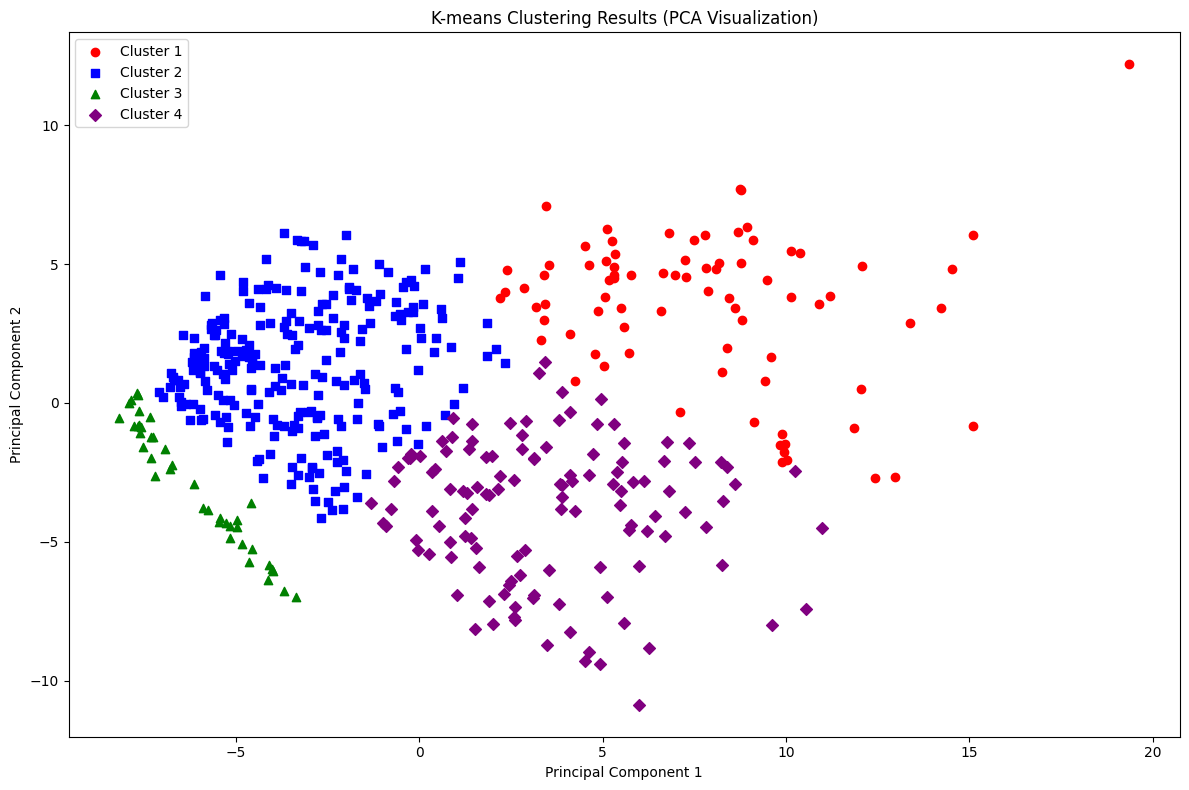

In [14]:
# Function to display clusters using PCA
def kmeans_display(X, label):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    print(X_pca.shape)
    plt.figure(figsize=(12, 8))

    # colors = ['red', 'blue', 'green', 'purple', 'cyan', 'magenta', 'yellow']
    # markers = ['o', 's', '^', 'D', 'v', '<', '>']

    colors = ['red', 'blue', 'green', 'purple']
    markers = ['o', 's', '^', 'D']

    for i in range(k):
        cluster_points = X_pca[label == i]
        if len(cluster_points) > 0:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                        c=colors[i], marker=markers[i], label=f'Cluster {i+1}')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering Results (PCA Visualization)')
    plt.legend()
    plt.tight_layout()
    plt.show()

pred_label = kmeans.labels_
kmeans_display(X_standardized, pred_label)

## Elbow method


Calculating WCSS for Elbow Method:
Displaying Elbow Method Plot...


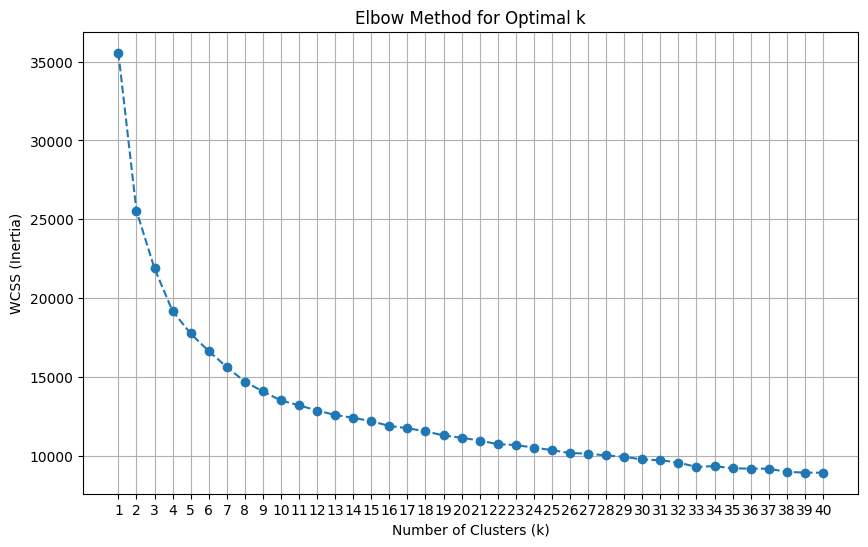

In [15]:
print("\nCalculating WCSS for Elbow Method:")
wcss = []
k_range = range(1, 41) 

for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    kmeans_elbow.fit(X_standardized)
    wcss.append(kmeans_elbow.inertia_) # inertia_ chính là WCSS

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range) 
plt.grid(True)
print("Displaying Elbow Method Plot...")
plt.show()


Calculating Silhouette Scores:
Displaying Silhouette Method Plot...


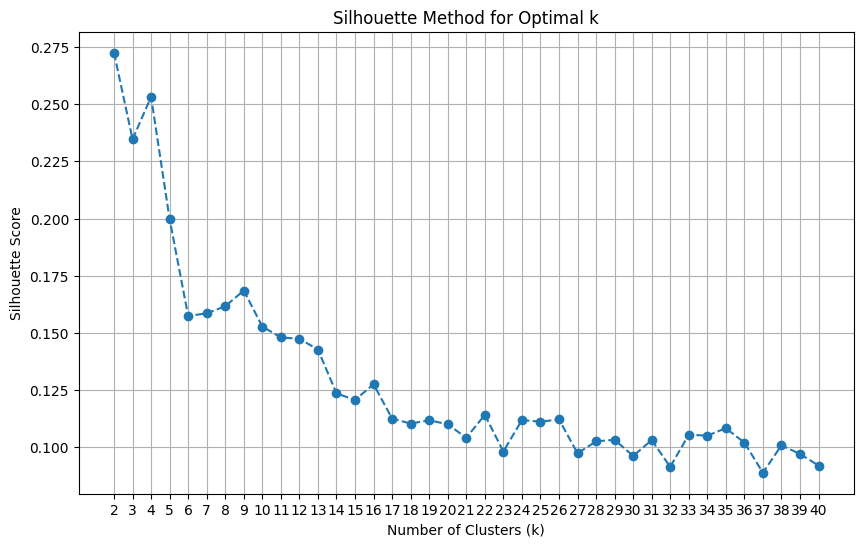

Please observe the plot to choose the optimal 'k' (highest silhouette score).


In [16]:
from sklearn.metrics import silhouette_score

print("\nCalculating Silhouette Scores:")
silhouette_scores = []
k_range = range(2, 41) 

for k in k_range:
    kmeans_silhouette = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=0)
    cluster_labels = kmeans_silhouette.fit_predict(X_standardized)
    silhouette_avg = silhouette_score(X_standardized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
print("Displaying Silhouette Method Plot...")
plt.show()
print("Please observe the plot to choose the optimal 'k' (highest silhouette score).")